# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\9_customerChurn\Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Luckly there is no empty blocks in the columns

In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

We will delete customer ID because it is not helpful asall the rows is different

In [6]:
df.drop(columns={"customerID"},inplace=True)

# Encoding The Data

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
objList = df.select_dtypes(include = "object").columns

In [9]:
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [11]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


# Scaling our data

### Seperating Target Variable

In [12]:
dfR=df["Churn"]

In [13]:
df.drop(columns={"Churn"},inplace=True)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [15]:
frames = [df, dfR]

df = pd.concat(frames,axis=1)

# EDA

### Histogram

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>],
       [<AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>],
       [<AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>],
       [<AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <A

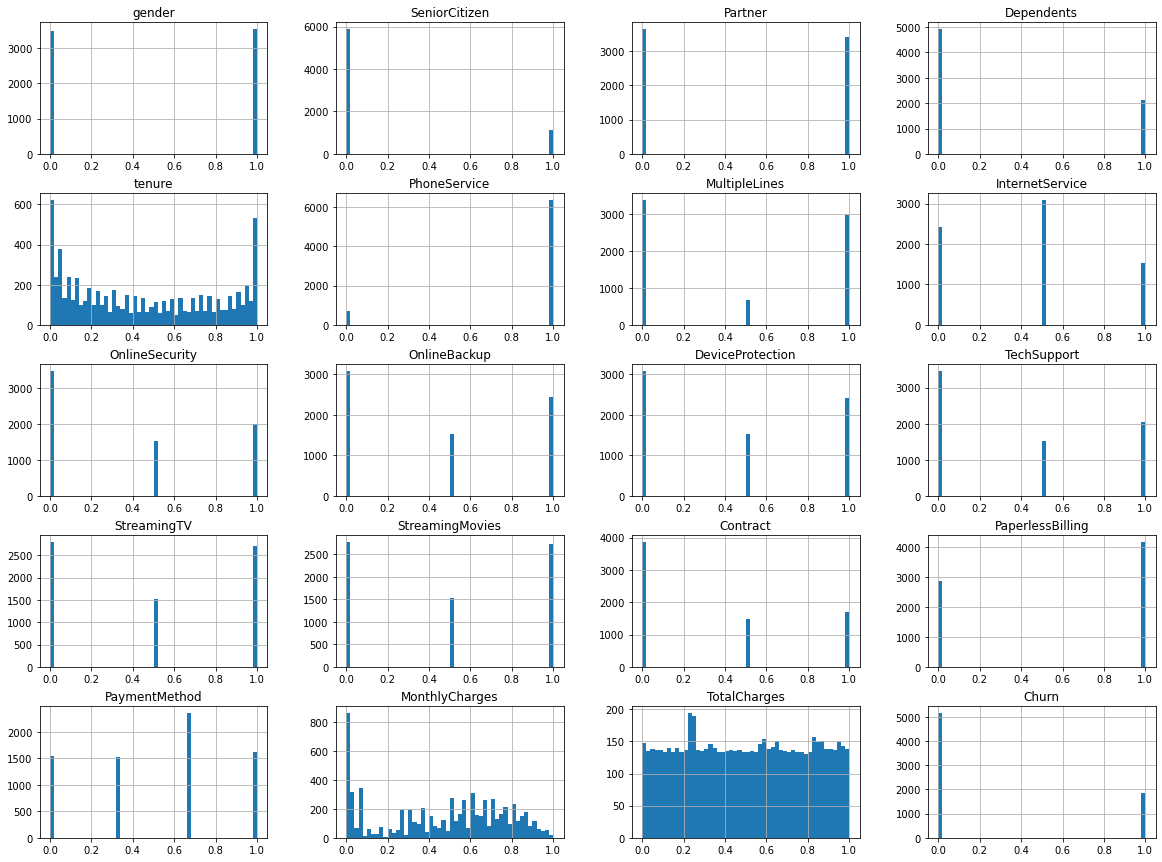

In [16]:
df.hist(bins=50,figsize=(20,15))

### Correlation

In [17]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


### Boxplot

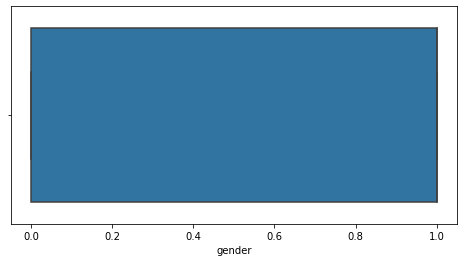

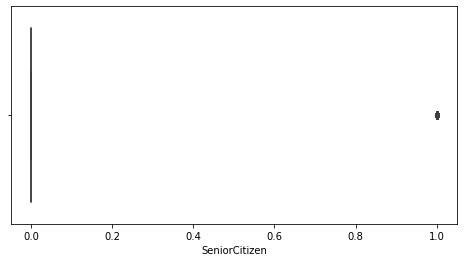

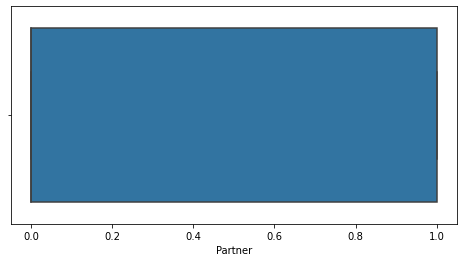

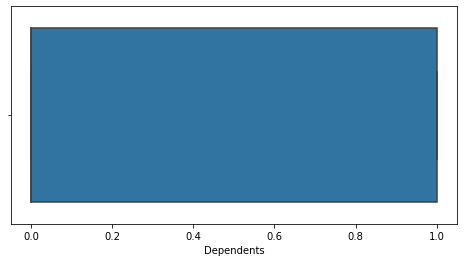

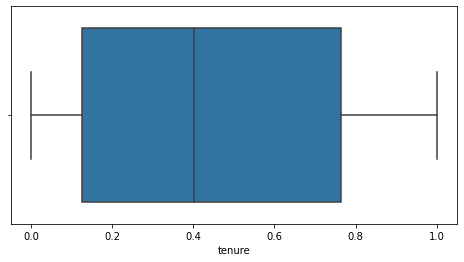

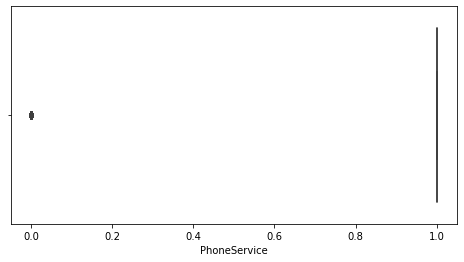

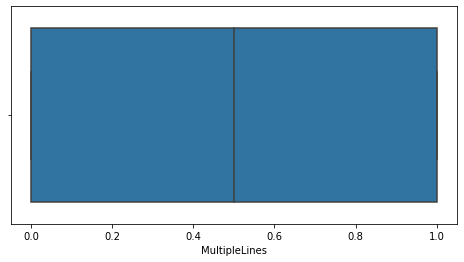

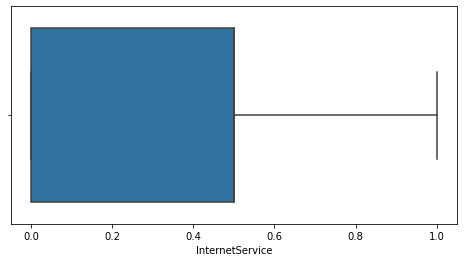

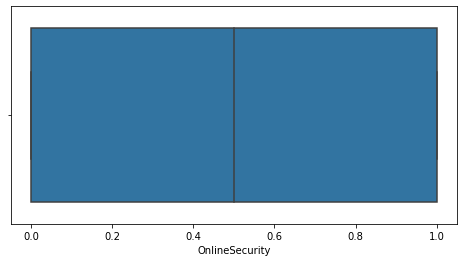

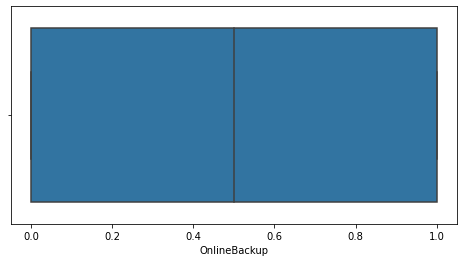

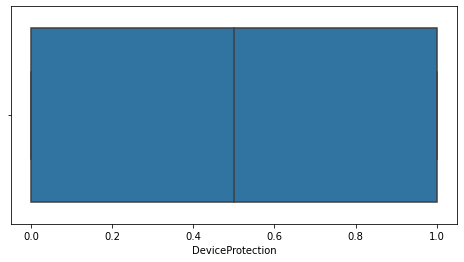

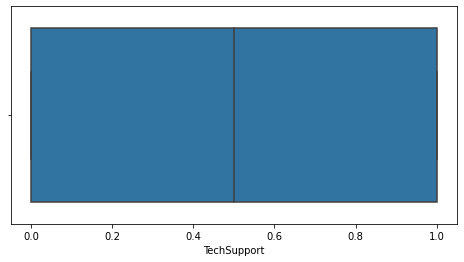

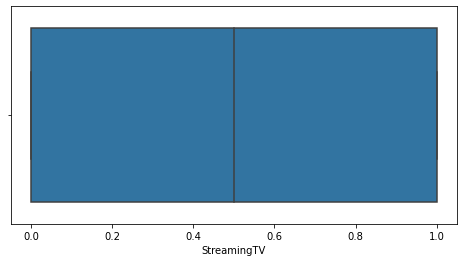

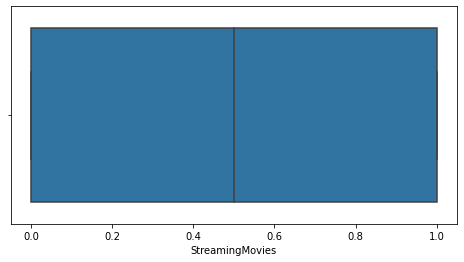

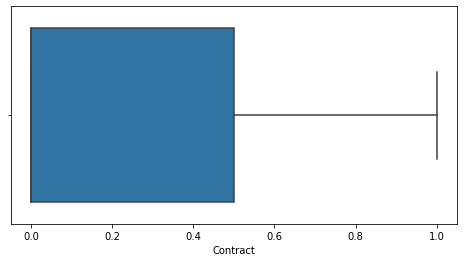

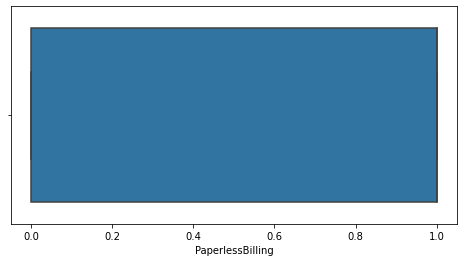

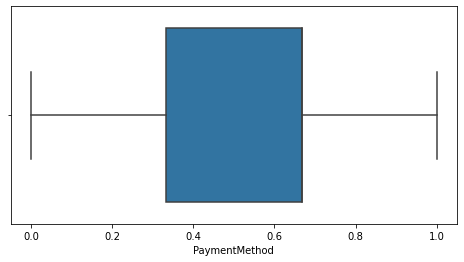

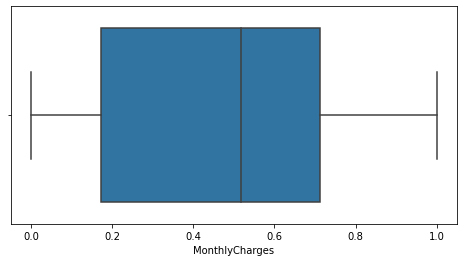

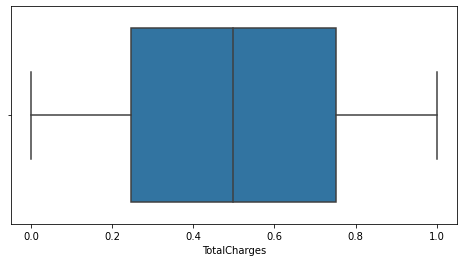

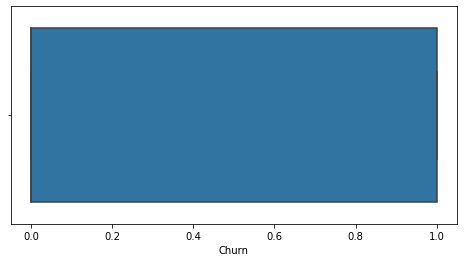

In [18]:
for column in df:
        plt.figure(figsize=(8,4))
        sn.boxplot(x=column,data=df)

Some of the columns have outliers

### Heatmap


<AxesSubplot:>

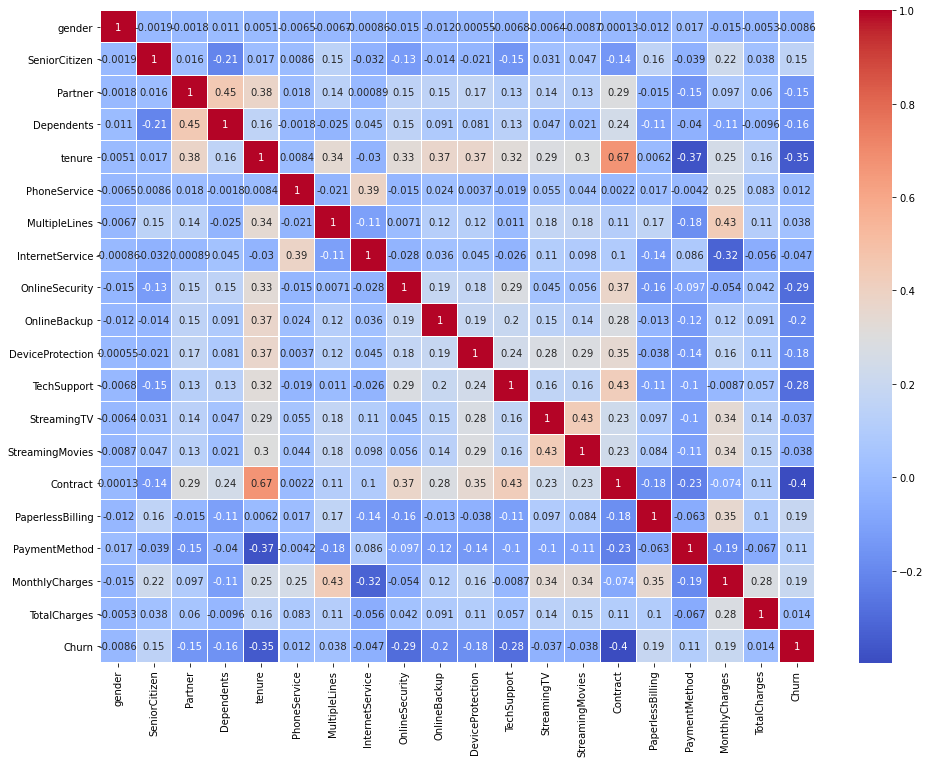

In [19]:
plt.figure(figsize=(16,12))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)

most of the columns are negetively correlated to our target variable.
Some of the column have high correlation within each other so I will delete some columns as it will hinder the model to learn properly.
Columns are:
    tenure
    StreamingTV
    StreamingMovies
    MonthlyCharges
    Partner

In [20]:
df.drop(columns={'tenure','StreamingTV','StreamingMovies','MonthlyCharges','Partner'},inplace=True)

### Distplot

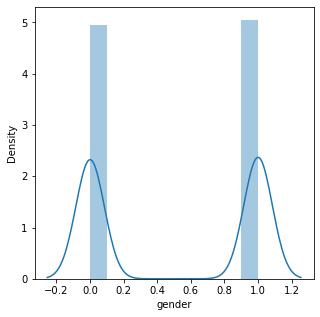

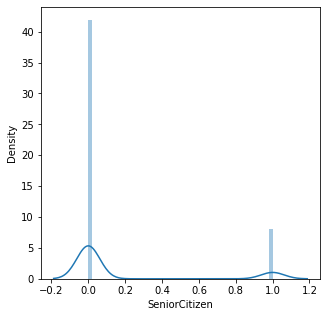

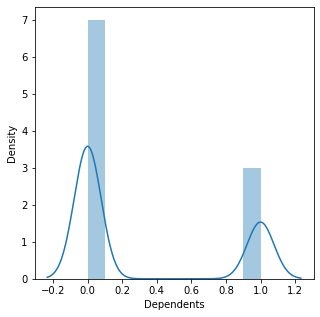

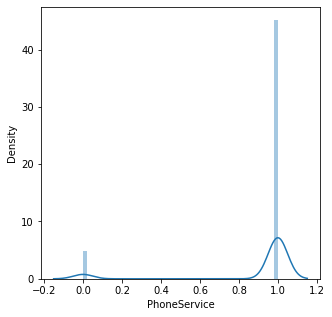

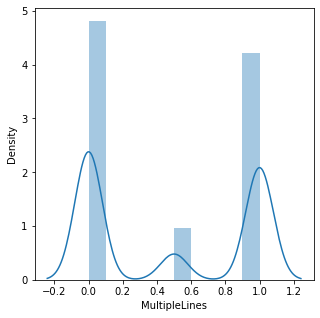

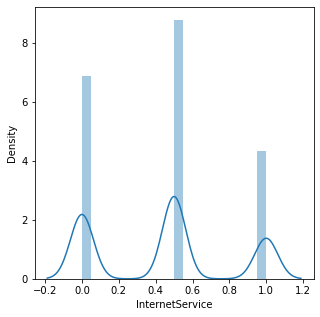

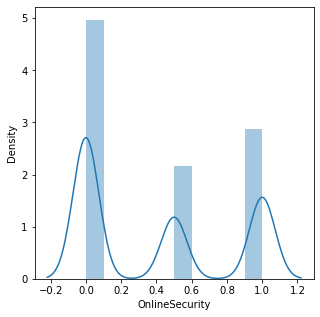

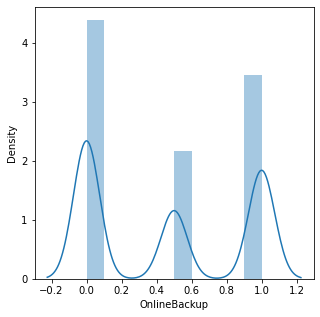

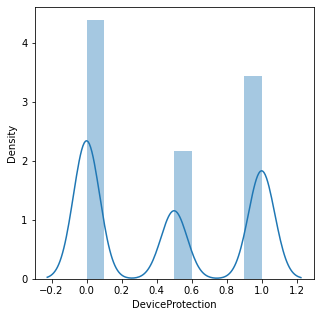

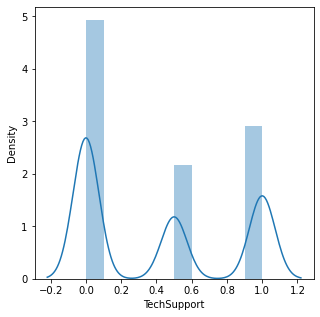

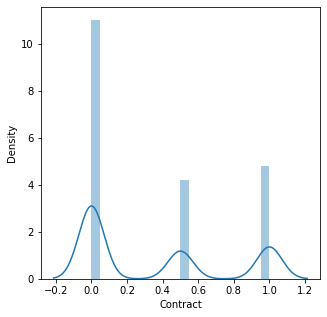

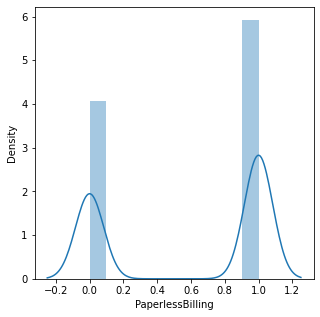

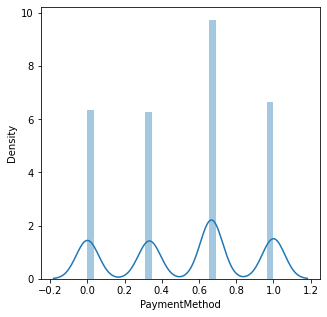

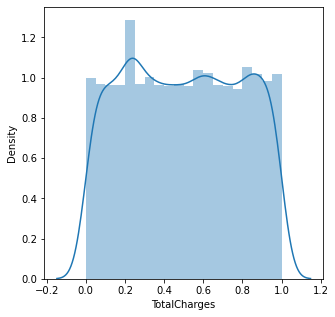

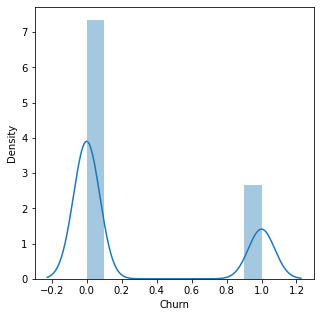

In [21]:
for column in df:
        plt.figure(figsize=(5,5))
        sn.distplot(df[column])

### Class Imbalence Check

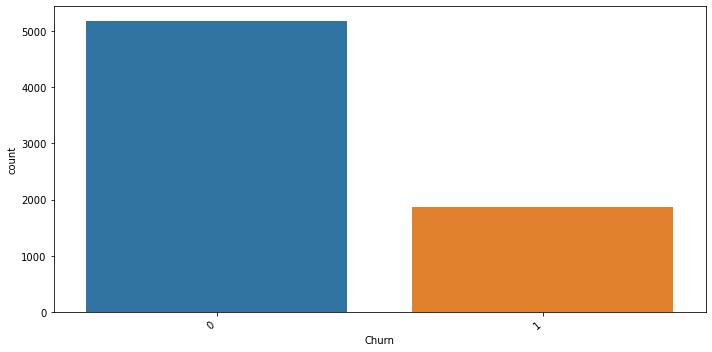

In [22]:
plt.figure(figsize=(10,5))
ax=sn.countplot(df["Churn"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

classes are highly imbalanced

# Removing Outliers

In [23]:
from scipy.stats import zscore

In [24]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [25]:
df.shape

(6361, 15)

# Skewness Removal

In [26]:
df.skew()

gender             -0.014781
SeniorCitizen       1.823376
Dependents          0.876594
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

# Input Splitting

In [27]:
x=df.drop(["Churn"],axis=1)

In [28]:
y=df["Churn"]

# Oversampling our Churn

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
ros=RandomOverSampler(random_state=0)

In [31]:
x,y=ros.fit_resample(x,y)

# Finding The Best Model

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [33]:
#classify function
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.10,random_state=343)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("Accuracy:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [34]:
DTC = DecisionTreeClassifier()
classify(DTC,x,y)

Accuracy: 70.84127740705433
CV Score: 87.43043298162446
Diffrence: 16.58915557457013


In [35]:
RC = RidgeClassifier()
classify(RC,x,y)

Accuracy: 73.58198284080076
CV Score: 74.39944079439414
Diffrence: 0.8174579535933759


In [36]:
RFC = RandomForestClassifier()
classify(RFC,x,y)

Accuracy: 75.45281220209723
CV Score: 89.01779447468043
Diffrence: 13.564982272583194


In [37]:
KNN = KNeighborsClassifier()
classify(KNN,x,y)

Accuracy: 72.02097235462345
CV Score: 76.12625274712632
Diffrence: 4.105280392502863


In [38]:
ETC = ExtraTreesClassifier()
classify(ETC,x,y)

Accuracy: 73.16491897044804
CV Score: 89.40385920905776
Diffrence: 16.238940238609715


Ridge Classifier is our best model

# Hyper parameter tuning

In [39]:
RC.get_params()

{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
params = {'copy_X': [True,False],
          'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
          'normalize': [True,False],
         'max_iter': [1000,1200,1400,1600,1800,2000],
         'random_state': ['scoring','verbose','warm_start']}

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.10,random_state=7)
gs = GridSearchCV(RC, params, verbose = 1, cv=5, n_jobs = -1)

In [43]:
gs.fit(X_train, Y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'max_iter': [1000, 1200, 1400, 1600, 1800, 2000],
                         'normalize': [True, False],
                         'random_state': ['scoring', 'verbose', 'warm_start'],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             verbose=1)

In [44]:
gs.best_params_

{'copy_X': True,
 'max_iter': 1000,
 'normalize': True,
 'random_state': 'scoring',
 'solver': 'auto'}

# Checking Accuracy Score

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [46]:
RC=RidgeClassifier(copy_X=True,
 max_iter= 1000,
 normalize= True,
 random_state= 'scoring',
 solver='auto')

In [47]:
RC.fit(X_train,Y_train)

RidgeClassifier(max_iter=1000, normalize=True, random_state='scoring')

In [48]:
RC.score(X_test,Y_test)

0.74058627264061

In [49]:
y_test_pred=RC.predict(X_test)

In [50]:
print(RC.score(X_test, y_test_pred))

1.0


# Finally Saving our model

In [56]:
import joblib
joblib.dump(ETC,r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\9_customerChurn\churn.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\EvaluationProjects\\9_customerChurn\\churn.pkl']